In [1]:
import warnings
warnings.filterwarnings("ignore")

import env
import Liam_wrangle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_zillow.csv')

In [3]:
cols = ['bathrooms',
 'bedrooms',
 'quality',
 'square_feet',
 'fips',
 'latitude',
 'longitude',
 'lot_square_feet',
 'structure_tax_value',
 'land_tax_value',
 'taxamount',
 'house_age']

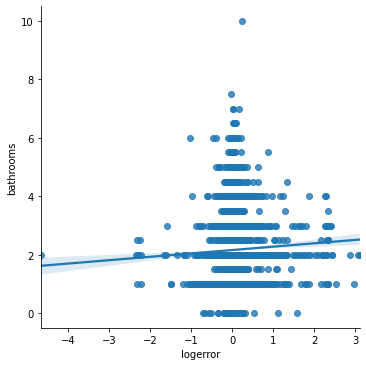

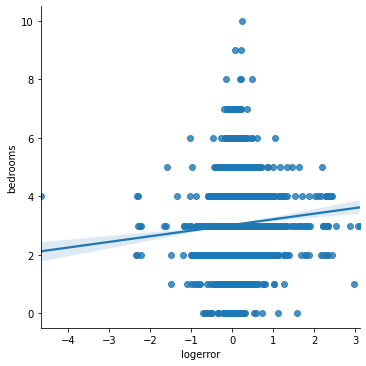

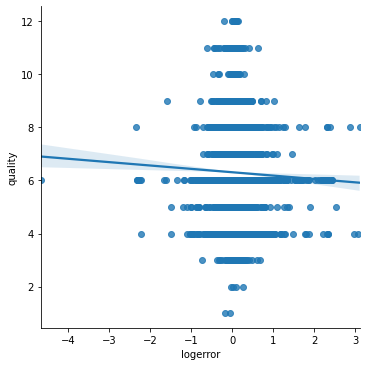

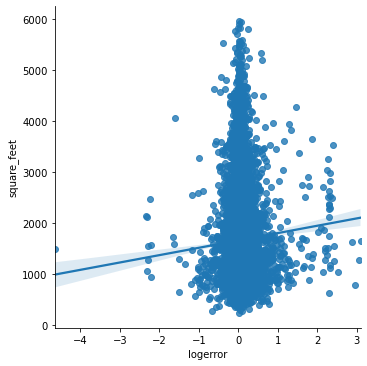

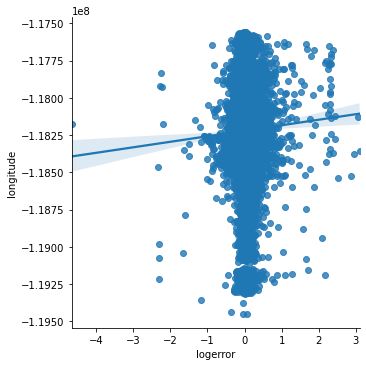

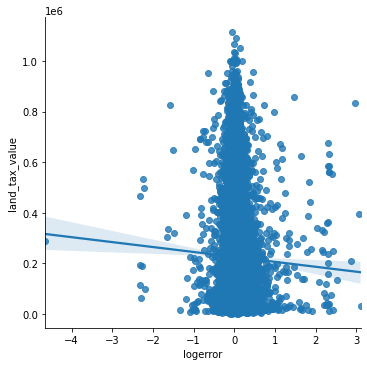

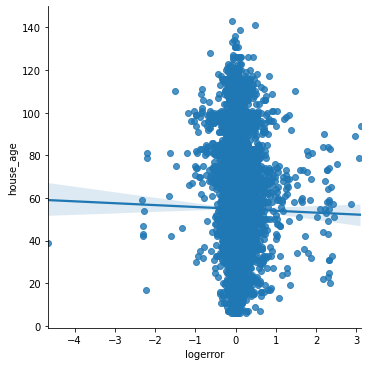

In [4]:
for col in cols:
    g = sns.lmplot(x='logerror', y=col, data=train)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33448 entries, 0 to 33447
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             33448 non-null  int64  
 1   land_type            33448 non-null  float64
 2   has_heating_system   33448 non-null  int64  
 3   bathrooms            33448 non-null  float64
 4   bedrooms             33448 non-null  float64
 5   quality              33448 non-null  float64
 6   square_feet          33448 non-null  float64
 7   fips                 33448 non-null  float64
 8   has_fireplace        33448 non-null  float64
 9   full_bathrooms       33448 non-null  float64
 10  latitude             33448 non-null  float64
 11  longitude            33448 non-null  float64
 12  lot_square_feet      33448 non-null  float64
 13  has_pool             33448 non-null  float64
 14  city                 33448 non-null  float64
 15  county               33448 non-null 

In [6]:
train.room_count.value_counts()

0.0     25336
6.0      2246
7.0      1951
8.0      1475
5.0      1171
9.0       600
4.0       421
10.0      155
3.0        46
11.0       32
2.0         8
12.0        7
Name: room_count, dtype: int64

## What we want to cluster

land_type          
bathrooms           
bedrooms            
quality             
square_feet         
fips                
latitude            
longitude           
lot_square_feet    
city               
room_count          
structure_tax_value            
land_tax_value                 
house_age            
acres                   
square_feet_bins     
lot_sqft_bins
acre_bins

In [7]:
# quality, roomcount, house_age

In [8]:
X = train[['quality', 'house_age', 'room_count']]
X.head(3)

quality  house_age  room_count
0      6.0       70.0         0.0
1      6.0       65.0         4.0
2      4.0       81.0         0.0

In [9]:
# Scale the X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [10]:
X_scaled.head()

quality  house_age  room_count
0 -0.225719   0.684838   -0.549290
1 -0.225719   0.458142    0.811344
2 -1.708842   1.183571   -0.549290
3 -0.225719  -0.176609   -0.549290
4  1.257405  -1.174074   -0.549290

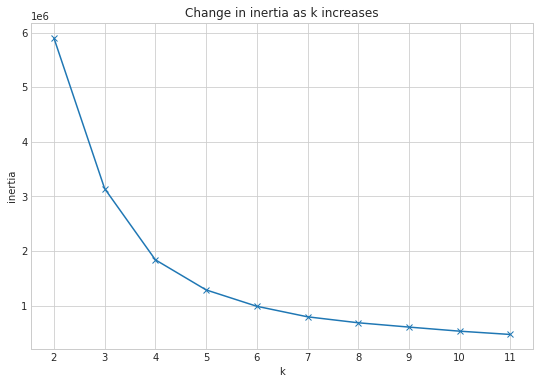

In [11]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [12]:
import viz_kmeans

#define the thing
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([4, 0, 1, ..., 2, 0, 3], dtype=int32)

In [13]:
train['quality_houseage_roomcount_cluster'] = kmeans.predict(X_scaled)

train.head(20)

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
0   12397645      261.0                   1        2.0       3.0      6.0   
1   13899643      261.0                   0        1.0       2.0      6.0   
2   10936804      261.0                   1        1.0       2.0      4.0   
3   12877473      261.0                   1        3.0       5.0      6.0   
4   11190920      261.0                   1        2.0       4.0      8.0   
5   12553557      266.0                   1        1.0       1.0      6.0   
6   14178220      261.0                   0        3.0       3.0      6.0   
7   17051872      261.0                   0        3.5       4.0      6.0   
8   12265697      261.0                   1        1.0       3.0      4.0   
9   12101593      261.0                   1        1.0       2.0      4.0   
10  13960829      261.0                   0        3.0       4.0      6.0   
11  11242025      263.0                   0        2.0       2.0      6.0   
12  12757963      261.0                   1        1.0       2.0      4.0   
13  11015092      261.0                   1        2.0       3.0      8.0   
14  10722712      261.0                   1        2.0       3.0      6.0   
15  12281960      261.0                   1        1.0       2.0      5.0   
16  12826444      261.0                   1        1.0       3.0      4.0   
17  12264906      261.0                   1        1.0       2.0      5.0   
18  10720062      261.0                   1        2.0       4.0      6.0   
19  11054789      261.0                   1        2.0       4.0      8.0   

    square_feet    fips  has_fireplace  full_bathrooms  ...  in_orange_county  \
0        1139.0  6037.0            0.0             2.0  ...                 0   
1         882.0  6059.0            0.0             1.0  ...                 1   
2         943.0  6037.0            0.0             1.0  ...                 0   
3        1449.0  6037.0            0.0             3.0  ...                 0   
4        1546.0  6037.0            0.0             2.0  ...                 0   
5         605.0  6037.0            0.0             1.0  ...                 0   
6        2270.0  6059.0            1.0             3.0  ...                 1   
7        3010.0  6111.0            1.0             3.0  ...                 0   
8        1326.0  6037.0            0.0             1.0  ...                 0   
9         800.0  6037.0            0.0             1.0  ...                 0   
10       2546.0  6059.0            1.0             3.0  ...                 1   
11       1344.0  6037.0            0.0             2.0  ...                 0   
12       1117.0  6037.0            0.0             1.0  ...                 0   
13       1745.0  6037.0            0.0             2.0  ...                 0   
14       1830.0  6037.0            0.0             2.0  ...                 0   
15        810.0  6037.0            0.0             1.0  ...                 0   
16       1076.0  6037.0            0.0             1.0  ...                 0   
17        741.0  6037.0            0.0             1.0  ...                 0   
18       1456.0  6037.0            0.0             2.0  ...                 0   
19       1642.0  6037.0            0.0             2.0  ...                 0   

    in_ventura  house_age   tax_rate     acres  level_of_log_error  \
0            0       70.0  77.088243  0.115886            Accurate   
1            0       65.0  99.593289  0.094582            Accurate   
2            0       81.0  91.300853  0.163522            Accurate   
3            0       51.0  77.842486  0.141919                Over   
4            0       29.0  51.992135  0.195294            Accurate   
5            0       64.0  77.385006  0.344881            Accurate   
6            0       57.0  84.373945  0.165289            Accurate   
7            1       35.0  88.051898  2.630005            Accurate   
8            0       70.0  69.243449  0.115014        

In [14]:
X_scaled['quality_houseage_roomcount_cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

quality  house_age  room_count  quality_houseage_roomcount_cluster
0 -0.225719   0.684838   -0.549290                                   4
1 -0.225719   0.458142    0.811344                                   0
2 -1.708842   1.183571   -0.549290                                   1
3 -0.225719  -0.176609   -0.549290                                   2
4  1.257405  -1.174074   -0.549290                                   3

In [15]:
# Cluster Centers aka (centroids)
kmeans.cluster_centers_

array([[-0.22571873, -0.16456591,  1.73995799],
       [-1.60512441,  1.15348889, -0.54928951],
       [-0.029639  , -1.05368495, -0.54291229],
       [ 1.36339554, -0.54561518, -0.54928951],
       [-0.020676  ,  0.81325094, -0.50760343]])

In [16]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

quality  house_age  room_count
0 -0.225719  -0.164566    1.739958
1 -1.605124   1.153489   -0.549290
2 -0.029639  -1.053685   -0.542912
3  1.363396  -0.545615   -0.549290
4 -0.020676   0.813251   -0.507603

In [17]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(20, 40))

# scatter plot of data with hue for cluster
plt.subplot(5,1,1)
sns.scatterplot(x = 'quality', y= 'room_count', data = X_scaled, hue = 'quality_houseage_roomcount_cluster')
centroids_scaled.plot.scatter(x = 'room_count', y = 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


plt.subplot(5,1,2)
sns.scatterplot(x = 'house_age', y= 'quality', data = X_scaled, hue = 'quality_houseage_roomcount_cluster')
centroids_scaled.plot.scatter(x = 'house_age', y = 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


plt.subplot(5,1,3)
sns.scatterplot(x = 'house_age', y= 'room_count', data = X_scaled, hue = 'quality_houseage_roomcount_cluster')
centroids_scaled.plot.scatter(x = 'house_age', y = 'room_count', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


plt.legend();

In [18]:
train.room_count.value_counts()

0.0     25336
6.0      2246
7.0      1951
8.0      1475
5.0      1171
9.0       600
4.0       421
10.0      155
3.0        46
11.0       32
2.0         8
12.0        7
Name: room_count, dtype: int64

In [19]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.relplot(x = 'house_age', y= 'quality', data = X_scaled, col = X_scaled.quality_houseage_roomcount_cluster, col_wrap = 2, hue = train.level_of_log_error)

# plot cluster centers (centroids)

# centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.show();

<Figure size 1008x648 with 0 Axes>

In [20]:
X_scaled

quality  house_age  room_count  quality_houseage_roomcount_cluster
0     -0.225719   0.684838   -0.549290                                   4
1     -0.225719   0.458142    0.811344                                   0
2     -1.708842   1.183571   -0.549290                                   1
3     -0.225719  -0.176609   -0.549290                                   2
4      1.257405  -1.174074   -0.549290                                   3
...         ...        ...         ...                                 ...
33443 -0.225719   0.820856   -0.549290                                   4
33444 -1.708842   0.866195   -0.549290                                   1
33445 -0.225719  -1.582128   -0.549290                                   2
33446 -0.225719  -0.085930    2.512136                                   0
33447  1.257405   0.367463   -0.549290                                   3

[33448 rows x 4 columns]

In [57]:
train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
0  12397645      261.0                   1        2.0       3.0      6.0   
1  13899643      261.0                   0        1.0       2.0      6.0   
2  10936804      261.0                   1        1.0       2.0      4.0   
3  12877473      261.0                   1        3.0       5.0      6.0   
4  11190920      261.0                   1        2.0       4.0      8.0   

   square_feet    fips  has_fireplace  full_bathrooms  ...  in_orange_county  \
0       1139.0  6037.0            0.0             2.0  ...                 0   
1        882.0  6059.0            0.0             1.0  ...                 1   
2        943.0  6037.0            0.0             1.0  ...                 0   
3       1449.0  6037.0            0.0             3.0  ...                 0   
4       1546.0  6037.0            0.0             2.0  ...                 0   

   in_ventura  house_age   tax_rate     acres  level_of_log_error  \
0           0       70.0  77.088243  0.115886            Accurate   
1           0       65.0  99.593289  0.094582            Accurate   
2           0       81.0  91.300853  0.163522            Accurate   
3           0       51.0  77.842486  0.141919                Over   
4           0       29.0  51.992135  0.195294            Accurate   

   square_feet_bins  lot_sqft_bins  acre_bins  \
0           1k-1.5k          0-10k       0-15   
1            500-1k          0-10k       0-15   
2            500-1k          0-10k       0-15   
3           1k-1.5k          0-10k       0-15   
4           1.5l-2k          0-10k       0-15   

   quality_houseage_roomcount_cluster  
0                                   4  
1                                   0  
2                                   1  
3                                   2  
4                                   3  

[5 rows x 35 columns]

In [58]:
dummy_df =  pd.get_dummies(train['quality_houseage_roomcount_cluster'])
dummy_df.columns = ['zero', 'one', 'two', 'three', 'four']
df = pd.concat([train, dummy_df], axis=1)

In [59]:
df.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
0  12397645      261.0                   1        2.0       3.0      6.0   
1  13899643      261.0                   0        1.0       2.0      6.0   
2  10936804      261.0                   1        1.0       2.0      4.0   
3  12877473      261.0                   1        3.0       5.0      6.0   
4  11190920      261.0                   1        2.0       4.0      8.0   

   square_feet    fips  has_fireplace  full_bathrooms  ...  \
0       1139.0  6037.0            0.0             2.0  ...   
1        882.0  6059.0            0.0             1.0  ...   
2        943.0  6037.0            0.0             1.0  ...   
3       1449.0  6037.0            0.0             3.0  ...   
4       1546.0  6037.0            0.0             2.0  ...   

   level_of_log_error  square_feet_bins  lot_sqft_bins  acre_bins  \
0            Accurate           1k-1.5k          0-10k       0-15   
1            Accurate            500-1k          0-10k       0-15   
2            Accurate            500-1k          0-10k       0-15   
3                Over           1k-1.5k          0-10k       0-15   
4            Accurate           1.5l-2k          0-10k       0-15   

   quality_houseage_roomcount_cluster  zero  one  two  three  four  
0                                   4     0    0    0      0     1  
1                                   0     1    0    0      0     0  
2                                   1     0    1    0      0     0  
3                                   2     0    0    1      0     0  
4                                   3     0    0    0      1     0  

[5 rows x 40 columns]

In [52]:
train.quality_houseage_roomcount_cluster.value_counts()

3    7934
0    7891
4    6528
2    5651
1    5444
Name: quality_houseage_roomcount_cluster, dtype: int64

In [24]:
df1 = df.groupby(['zero','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()
df1.head()

0
level_of_log_error       
Accurate            23087
Over                 1520
Under                 865
Way Over               67
Way Under              18

In [43]:
df1.sum()

0    25557
dtype: int64

In [25]:
df2= df.groupby(['one','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

df2.head()

0
level_of_log_error       
Accurate            25740
Over                 1429
Under                 744
Way Over               75
Way Under              16

In [44]:
df2.sum()

0    28004
dtype: int64

In [26]:
df3= df.groupby(['two','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

df3.head()

0
level_of_log_error       
Accurate            25109
Over                 1664
Under                 920
Way Over               83
Way Under              21

In [45]:
df3.sum()

0    27797
dtype: int64

In [37]:
df4= df.groupby(['three','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

df4.head()

0
level_of_log_error       
Accurate            23006
Over                 1560
Under                 839
Way Over               87
Way Under              22

In [46]:
df4.sum()

0    25514
dtype: int64

In [83]:
df5 = df.groupby(['four','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()
df5.head()

0
level_of_log_error       
Accurate            24598
Over                 1479
Under                 740
Way Over               84
Way Under              19

In [48]:
df5.sum()

0    26920
dtype: int64

In [85]:
plt.title("Percents of Each Log Error Level for Homeq = 0", size=20, color='black')
sns.barplot(y=df.zero, x='level_of_log_error', data=df,
               palette='viridis')

<AxesSubplot:title={'center':'Percents of Each Log Error Level for Homeq = 0'}, xlabel='level_of_log_error', ylabel='zero'>

In [88]:
plt.title("Percents of Each Log Error Level Older Homes Low Quality", size=20, color='black')
sns.barplot(y=df.one, x='level_of_log_error', data=df,
               palette='viridis')

<AxesSubplot:title={'center':'Percents of Each Log Error Level Older Homes Low Quality'}, xlabel='level_of_log_error', ylabel='one'>

In [86]:
plt.title("Percents of Each Log Error Level Younger Homes Avg. Quality", size=20, color='black')
sns.barplot(y=df.two, x='level_of_log_error', data=df,
               palette='viridis')

<AxesSubplot:title={'center':'Percents of Each Log Error Level Younger Homes Avg. Quality'}, xlabel='level_of_log_error', ylabel='two'>

<AxesSubplot:title={'center':'Percents of Each Log Error Level Newer Homes High Quality'}, xlabel='level_of_log_error', ylabel='three'>

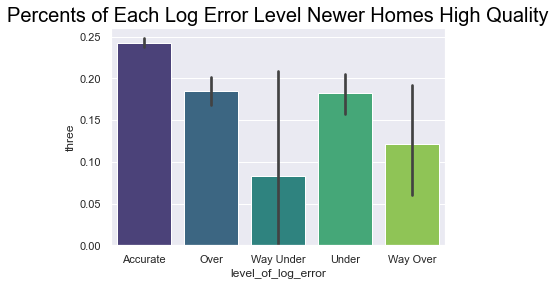

In [89]:
plt.title("Percents of Each Log Error Level Newer Homes High Quality", size=20, color='black')
sns.barplot(y=df.three, x='level_of_log_error', data=df,
               palette='viridis')

<AxesSubplot:title={'center':'Percents of Each Log Error Level Older Homes High Quality'}, xlabel='level_of_log_error', ylabel='four'>

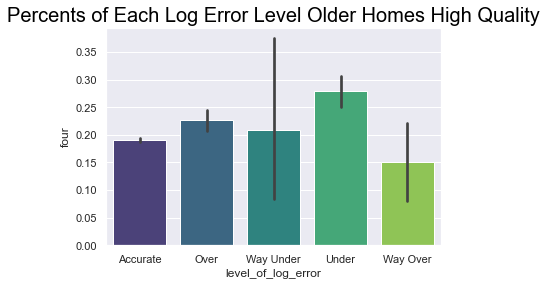

In [90]:
plt.title("Percents of Each Log Error Level Older Homes High Quality", size=20, color='black')
sns.barplot(y=df.four, x='level_of_log_error', data=df,
               palette='viridis')

SyntaxError: invalid syntax (<ipython-input-63-eea4d179f457>, line 1)

## Stat Tests

In [ ]:
# With logerror target

In [ ]:
from scipy import stats

In [ ]:
observed = pd.crosstab(train.logerror, X_scaled.quality_houseage_roomcount_cluster)

In [ ]:
observed

In [ ]:
alpha = .05

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
chi2, p, degf

In [ ]:
null_hypothesis = "logerror and has-heating_system are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

In [ ]:
# With Level_of_log_error target 

In [ ]:
observed = pd.crosstab(train.level_of_log_error, X_scaled.quality_houseage_roomcount_cluster)

In [ ]:
observed

In [ ]:
alpha = .05

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
chi2, p, degf

In [ ]:
null_hypothesis = "logerror and quality_houseage_roomcount_cluster are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

In [ ]:
# Anova Test

In [ ]:
# With logerror

In [ ]:
null_hypo = 'There is no signficant difference between the log error means of each individual cluster.'
alt_hypo = 'There is a signficant difference between the log error means of at least one of the 3 clusters.'
alpha = 0.05
F, p = stats.f_oneway(train[X_scaled.quality_houseage_roomcount_cluster == 0].logerror,
                      train[X_scaled.quality_houseage_roomcount_cluster == 1].logerror,
                      train[X_scaled.quality_houseage_roomcount_cluster == 2].logerror,
                      train[X_scaled.quality_houseage_roomcount_cluster == 3].logerror)

In [ ]:
if p < alpha:
    print('We reject the null hypothesis:\n',null_hypo, '\n')
    print('We continue forward with our alternative hypothesis:\n', alt_hypo,'\n')
else:
    print('We fail to reject the null hypothesis\n:', null_hypo,'\n')
    print('We stop here\n')
print('Anova Test Results on house_age and quality and roomcount Cluster')
print('Our F-value:\n',F)
print('Our P-value:\n',p)

In [ ]:
# With level_of_log_error ( can't. use due to string feature value)

In [ ]:
# Use one sample t-test to test each cluster (mean of one  1 cluster aginst mean oof all the others)
# or two samople t-test

In [ ]:
# bedroom, bathroom, city

In [ ]:
X = train[['bedrooms', 'bathrooms', 'quality']]
X.head(3)

In [ ]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [ ]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
#define the thing
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

In [ ]:
train['bedrooms_bathrooms_quality_cluster'] = kmeans.predict(X_scaled)

train.head()

In [ ]:
X_scaled['bedrooms_bathrooms_quality_cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

In [ ]:
# Cluster Centers aka (centroids)
kmeans.cluster_centers_

In [ ]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

In [ ]:
# lets visualize the clusters along with the centers on (scaled data).

# scatter plot of data with hue for cluster

plt.figure(figsize=(20, 40))

# scatter plot of data with hue for cluster
plt.subplot(5,1,1)
sns.scatterplot(x = 'bedrooms', y= 'bathrooms', data = X_scaled, hue = 'bedrooms_bathrooms_quality_cluster')
centroids_scaled.plot.scatter(x = 'bedrooms', y = 'bathrooms', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


plt.subplot(5,1,2)
sns.scatterplot(x = 'bedrooms', y= 'quality', data = X_scaled, hue = 'bedrooms_bathrooms_quality_cluster')
centroids_scaled.plot.scatter(x = 'bedrooms', y = 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


plt.subplot(5,1,3)
sns.scatterplot(x = 'bathrooms', y= 'quality', data = X_scaled, hue = 'bedrooms_bathrooms_quality_cluster')
centroids_scaled.plot.scatter(x = 'bathrooms', y = 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


plt.legend();


    # plt.subplot(5,1,2)
    # sns.swarmplot(x = 'bedrooms', y= 'quality', data = X_scaled, hue = X_scaled.bedrooms_bathrooms_quality_cluster, palette='viridis')
    # centroids_scaled.plot.scatter(x = 'bedrooms', y= 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


    # plt.subplot(5,1,3)
    # sns.swarmplot(x = 'bathrooms', y= 'quality', data = X_scaled, hue = X_scaled.bedrooms_bathrooms_quality_cluster, palette='viridis')
    # centroids_scaled.plot.scatter(x = 'bathrooms', y= 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


## Stat Tests

In [ ]:
# With logerror target

In [ ]:
observed = pd.crosstab(train.logerror, X_scaled.bedrooms_bathrooms_quality_cluster)

In [ ]:
observed

In [ ]:
alpha = .05

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
chi2, p, degf

In [ ]:
null_hypothesis = "logerror and bedrooms_bathrooms_quality_cluster are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

In [ ]:
# With level_of_log_error target

In [ ]:
observed = pd.crosstab(train.level_of_log_error, X_scaled.bedrooms_bathrooms_quality_cluster)

In [ ]:
observed

In [ ]:
alpha = .05

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
chi2, p, degf

In [ ]:
null_hypothesis = "level_of_log_error and bedrooms_bathrooms_quality_cluster are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

In [ ]:
# Anova Test

In [ ]:
null_hypo = 'There is no signficant difference between the log error means of each individual cluster.'
alt_hypo = 'There is a signficant difference between the log error means of at least one of the 3 clusters.'
alpha = 0.05
F, p = stats.f_oneway(train[X_scaled.bedrooms_bathrooms_quality_cluster == 0].logerror,
                      train[X_scaled.bedrooms_bathrooms_quality_cluster  == 1].logerror,
                      train[X_scaled.bedrooms_bathrooms_quality_cluster  == 2].logerror,
                      train[X_scaled.bedrooms_bathrooms_quality_cluster  == 3].logerror,
                      train[X_scaled.bedrooms_bathrooms_quality_cluster  == 4].logerror)

In [ ]:
if p < alpha:
    print('We reject the null hypothesis:\n',null_hypo, '\n')
    print('We continue forward with our alternative hypothesis:\n', alt_hypo,'\n')
else:
    print('We fail to reject the null hypothesis\n:', null_hypo,'\n')
    print('We stop here\n')
print('Anova Test Results on house_age and quality and roomcount Cluster')
print('Our F-value:\n',F)
print('Our P-value:\n',p)

In [91]:
X = train[['longitude', 'latitude', 'house_age']]
X.head(3)

longitude    latitude  house_age
0 -118093125.0  33961204.0       70.0
1 -117593933.0  33404202.0       65.0
2 -118344163.0  34183576.0       81.0

In [92]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

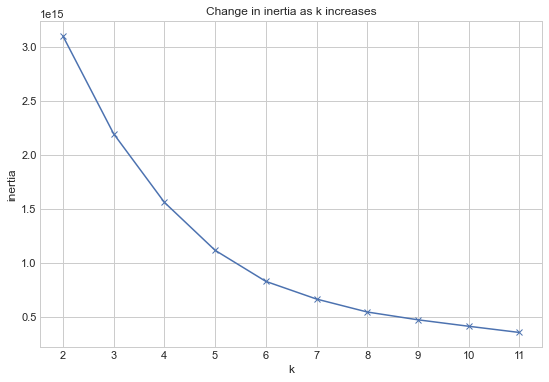

In [93]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [94]:
#define the thing
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([3, 1, 2, ..., 1, 0, 0], dtype=int32)

In [95]:
train['longitude_latitude_houseage_cluster'] = kmeans.predict(X_scaled)

train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
0  12397645      261.0                   1        2.0       3.0      6.0   
1  13899643      261.0                   0        1.0       2.0      6.0   
2  10936804      261.0                   1        1.0       2.0      4.0   
3  12877473      261.0                   1        3.0       5.0      6.0   
4  11190920      261.0                   1        2.0       4.0      8.0   

   square_feet    fips  has_fireplace  full_bathrooms  ...  in_ventura  \
0       1139.0  6037.0            0.0             2.0  ...           0   
1        882.0  6059.0            0.0             1.0  ...           0   
2        943.0  6037.0            0.0             1.0  ...           0   
3       1449.0  6037.0            0.0             3.0  ...           0   
4       1546.0  6037.0            0.0             2.0  ...           0   

   house_age   tax_rate     acres  level_of_log_error  square_feet_bins  \
0       70.0  77.088243  0.115886            Accurate           1k-1.5k   
1       65.0  99.593289  0.094582            Accurate            500-1k   
2       81.0  91.300853  0.163522            Accurate            500-1k   
3       51.0  77.842486  0.141919                Over           1k-1.5k   
4       29.0  51.992135  0.195294            Accurate           1.5l-2k   

   lot_sqft_bins  acre_bins  quality_houseage_roomcount_cluster  \
0          0-10k       0-15                                   4   
1          0-10k       0-15                                   0   
2          0-10k       0-15                                   1   
3          0-10k       0-15                                   2   
4          0-10k       0-15                                   3   

   longitude_latitude_houseage_cluster  
0                                    3  
1                                    1  
2                                    2  
3                                    3  
4                                    4  

[5 rows x 36 columns]

In [96]:
X_scaled['longitude_latitude_houseage_cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

longitude  latitude  house_age  longitude_latitude_houseage_cluster
0   0.365002 -0.287375   0.684838                                    3
1   1.799559 -2.412167   0.458142                                    1
2  -0.356420  0.560907   1.183571                                    2
3   1.394894  0.013933  -0.176609                                    3
4   0.114387  2.107693  -1.174074                                    4

In [97]:
# Cluster Centers aka (centroids)
kmeans.cluster_centers_

array([[-1.29847741,  0.62436069, -0.30730869],
       [ 1.22415066, -1.32424662, -0.92274515],
       [-0.13515923,  0.0434965 ,  1.37226484],
       [ 0.49510349, -0.48132043,  0.12649892],
       [-0.08876397,  1.72293142, -1.07571565]])

In [98]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

longitude  latitude  house_age
0  -1.298477  0.624361  -0.307309
1   1.224151 -1.324247  -0.922745
2  -0.135159  0.043497   1.372265
3   0.495103 -0.481320   0.126499
4  -0.088764  1.722931  -1.075716

In [99]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = X_scaled.longitude_latitude_houseage_cluster, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)



plt.legend();

<Figure size 1008x648 with 0 Axes>

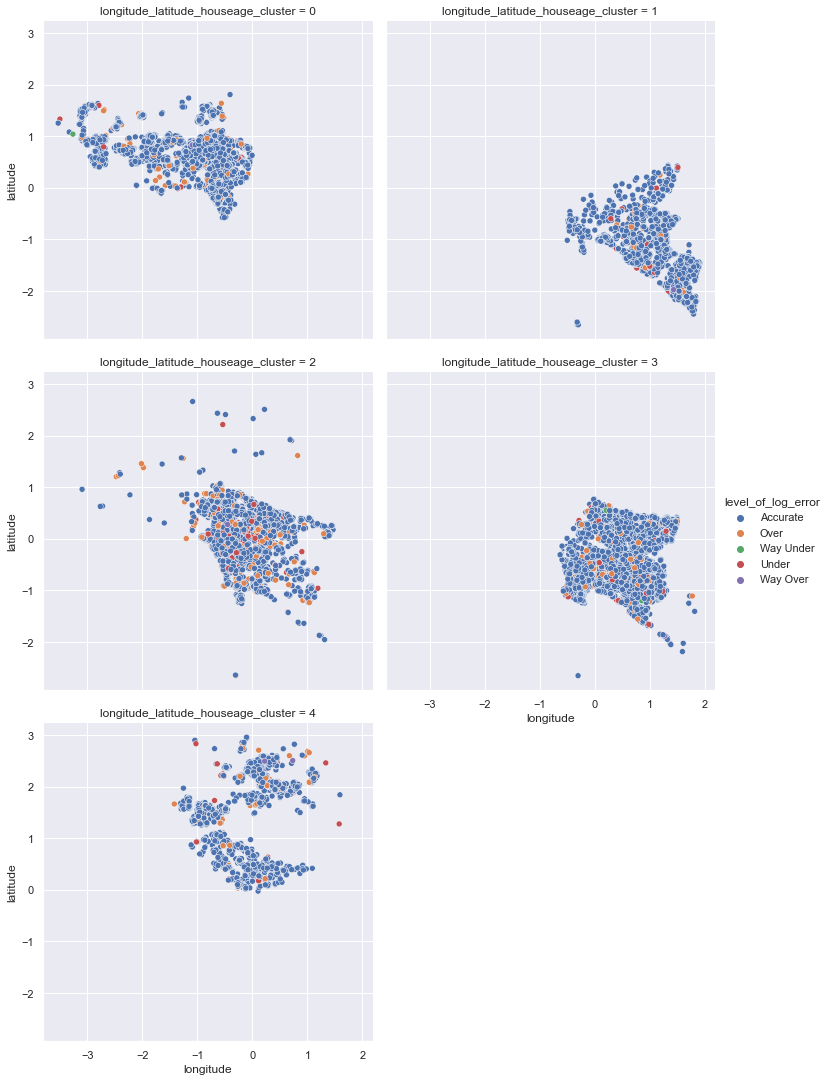

In [100]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.relplot(x = 'longitude', y= 'latitude', data = X_scaled, col = X_scaled.longitude_latitude_houseage_cluster, col_wrap = 2, hue = train.level_of_log_error)

# plot cluster centers (centroids)

# centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.show();

In [116]:
# 4 = North LA
# 3 = East downtown LA
# 2 = North downtown LA
# 1 = Orange County
# 0 = Ventura

In [117]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = X_scaled.house_age, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

ValueError: Could not interpret value `longitude` for parameter `x`

<Figure size 1440x1440 with 0 Axes>

In [102]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = train.level_of_log_error, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

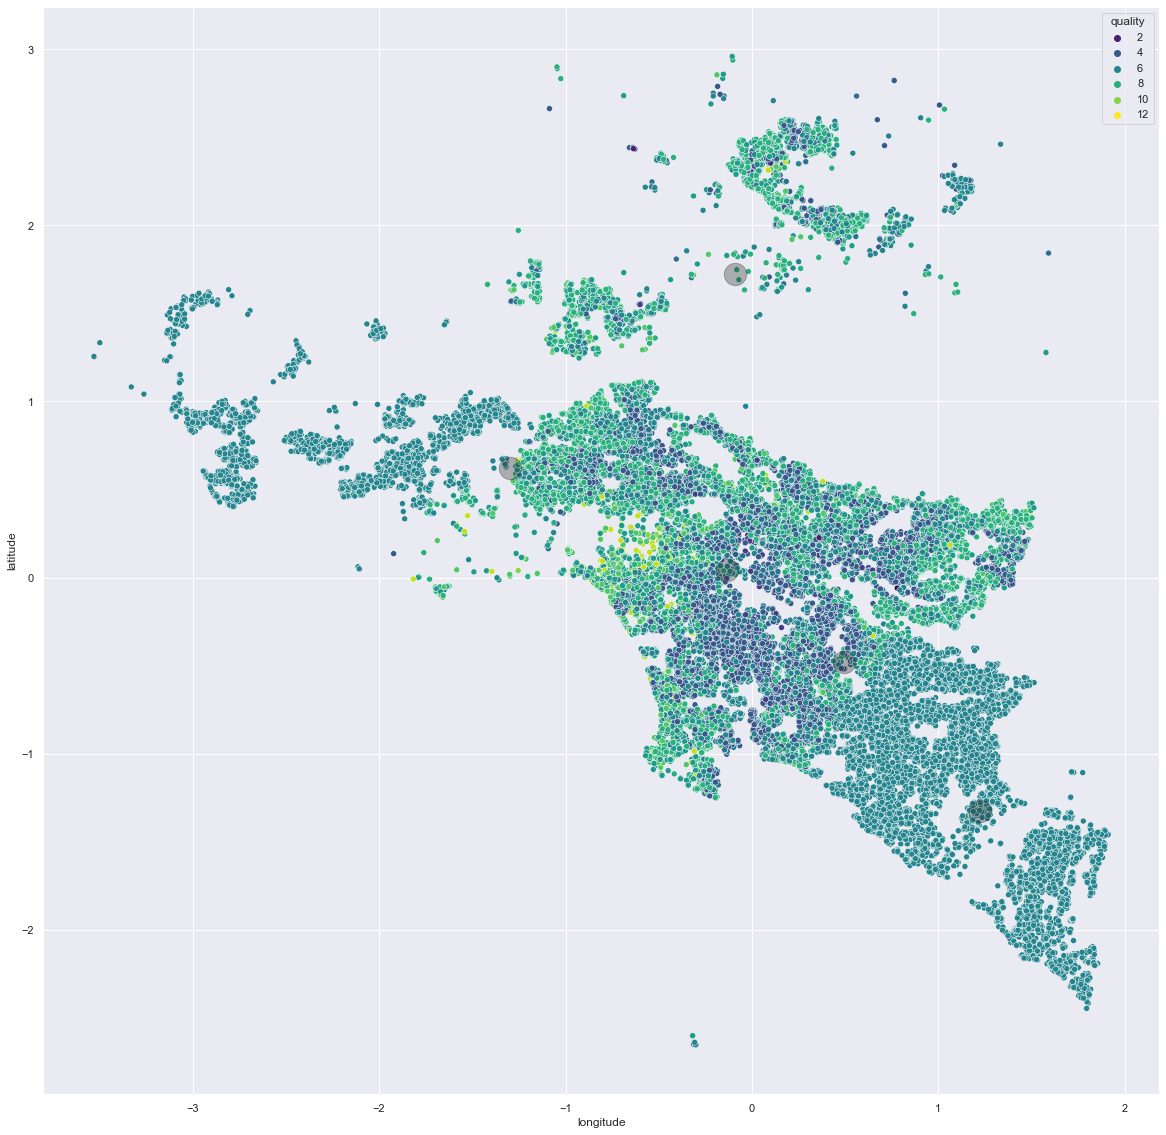

In [103]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = train.quality, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

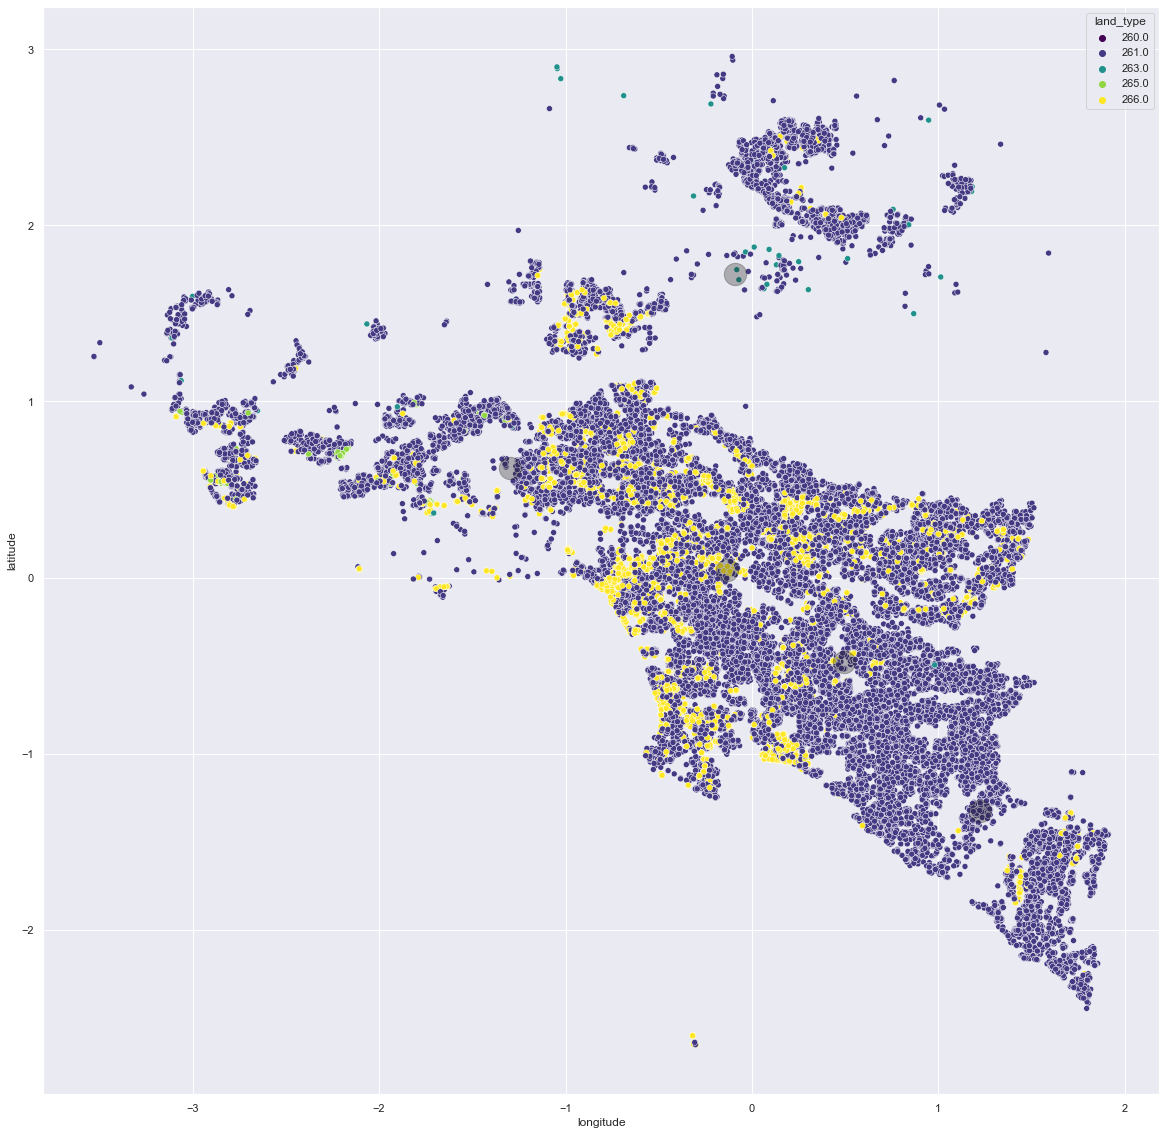

In [104]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = train.land_type, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

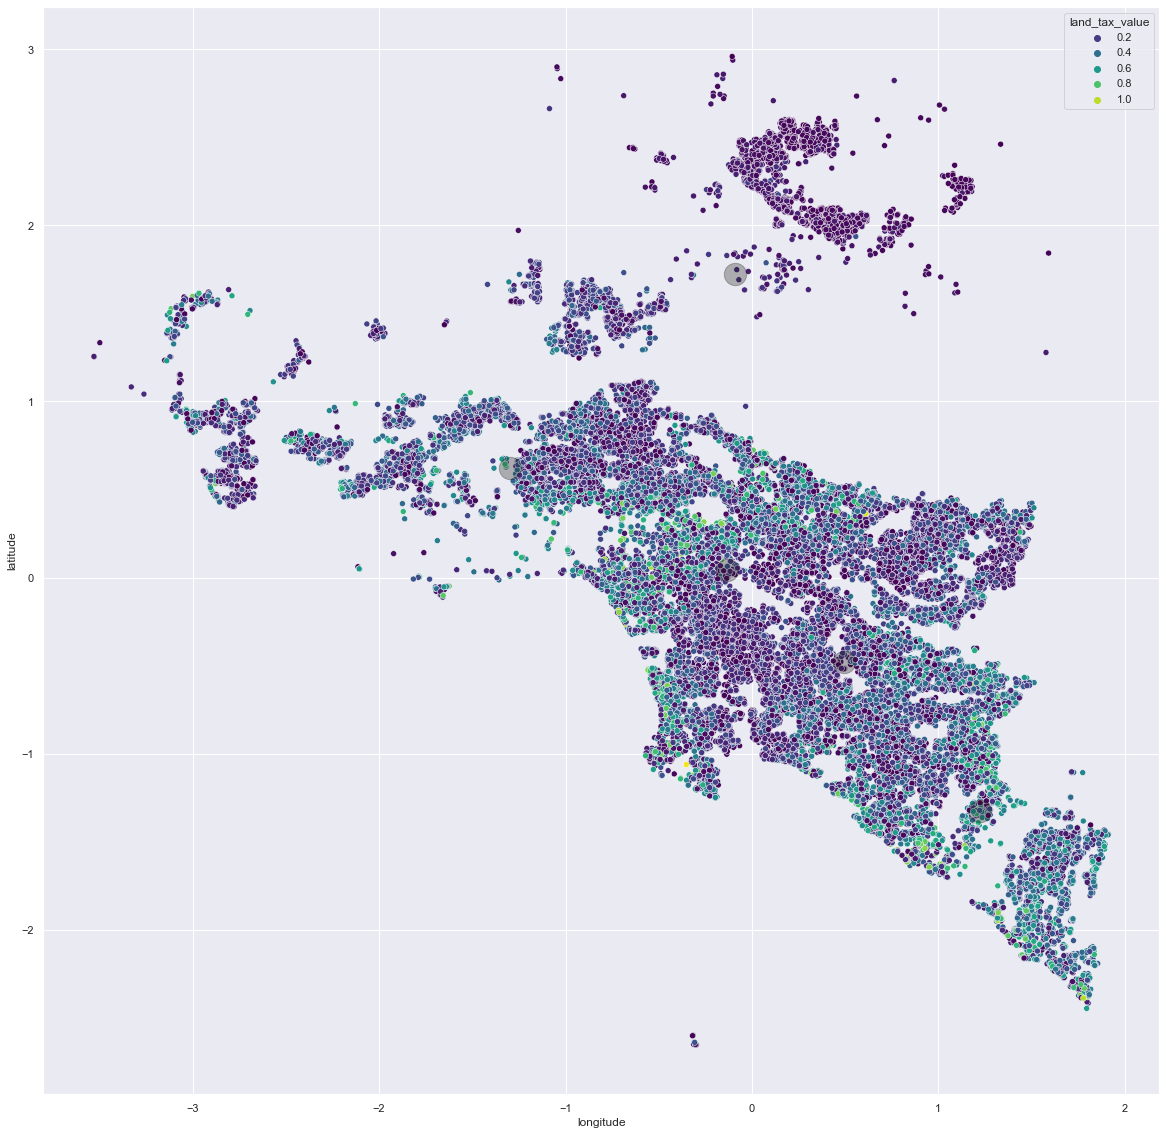

In [105]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = train.land_tax_value, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

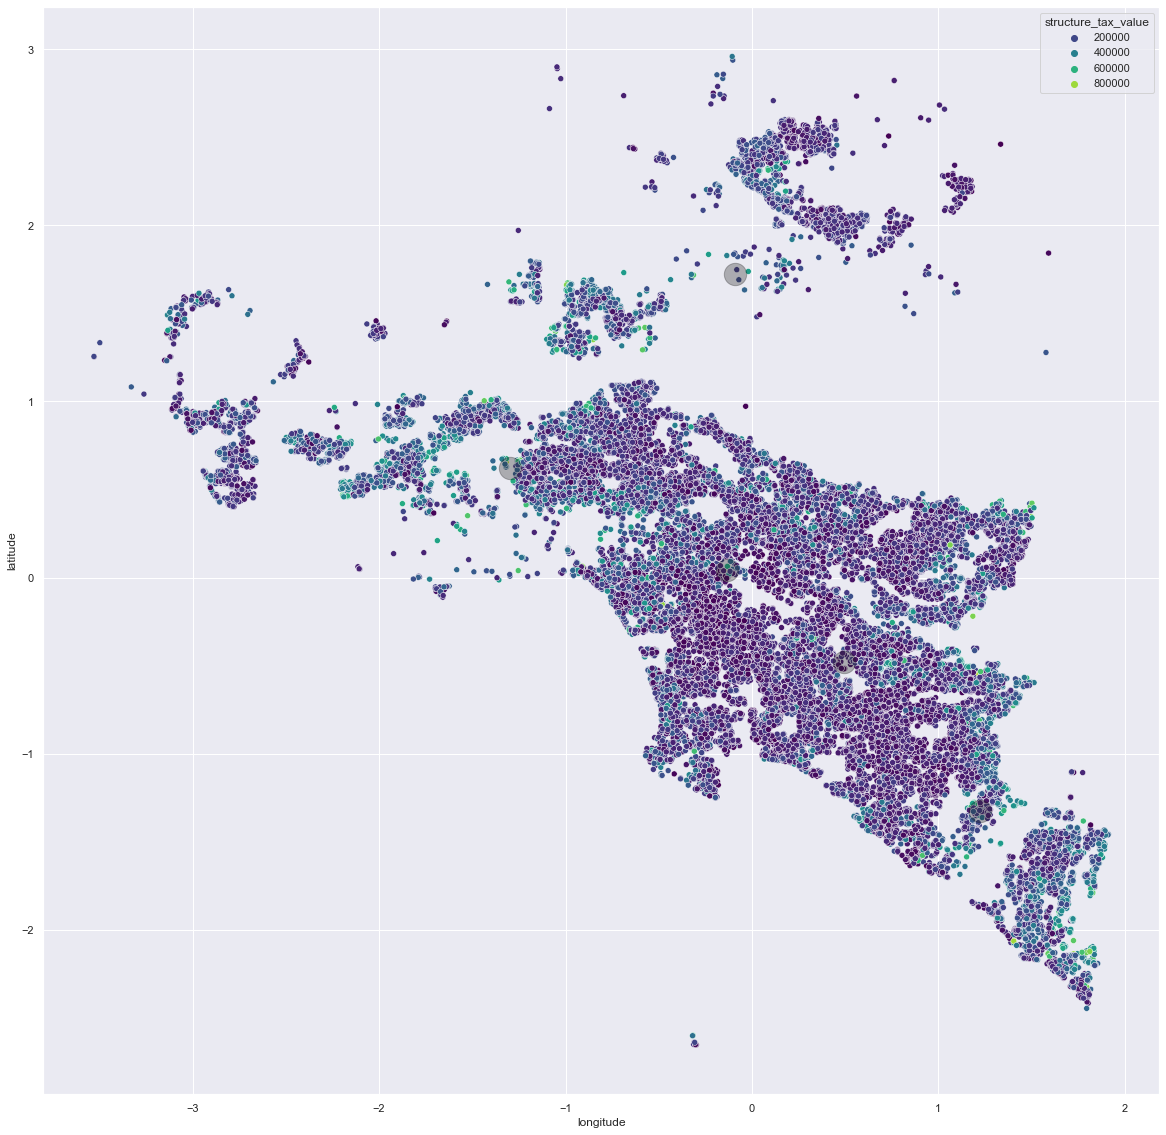

In [106]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = train.structure_tax_value, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

In [107]:
train.structure_tax_value.value_counts(ascending = False)

100000.0    31
90000.0     28
134871.0    25
116000.0    24
95000.0     23
            ..
32581.0      1
43900.0      1
190515.0     1
119834.0     1
196608.0     1
Name: structure_tax_value, Length: 24346, dtype: int64

In [108]:
train.land_tax_value.value_counts(ascending = False)

21299.0     54
30210.0     41
22755.0     35
16749.0     30
18611.0     28
            ..
17681.0      1
191545.0     1
135930.0     1
141450.0     1
245760.0     1
Name: land_tax_value, Length: 24275, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='house_age'>

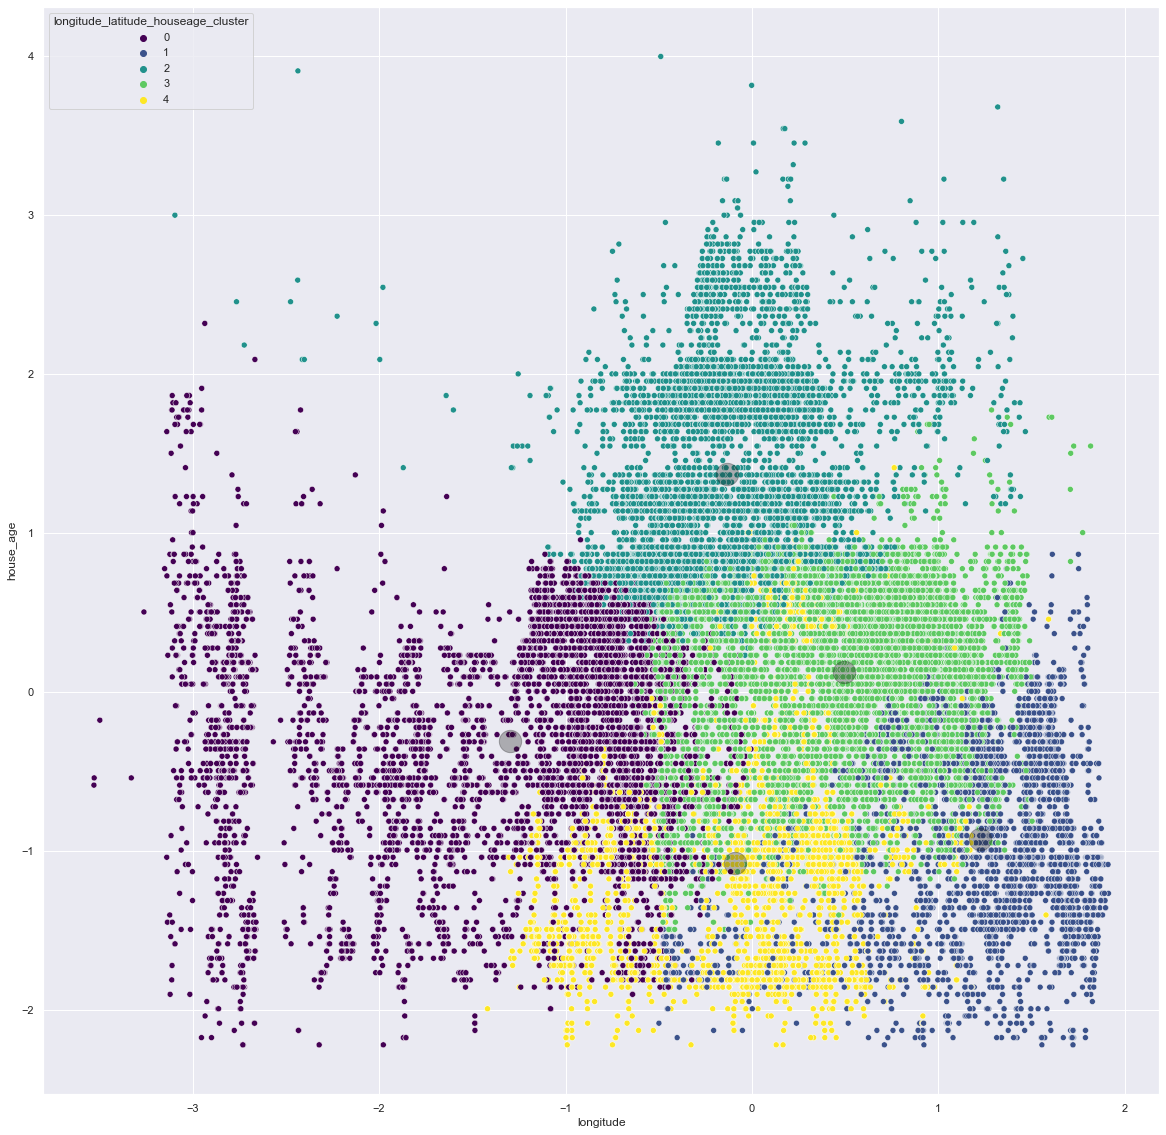

In [109]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = 'longitude', y= 'house_age', data = X_scaled, hue = X_scaled.longitude_latitude_houseage_cluster, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'house_age', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

<AxesSubplot:xlabel='house_age', ylabel='latitude'>

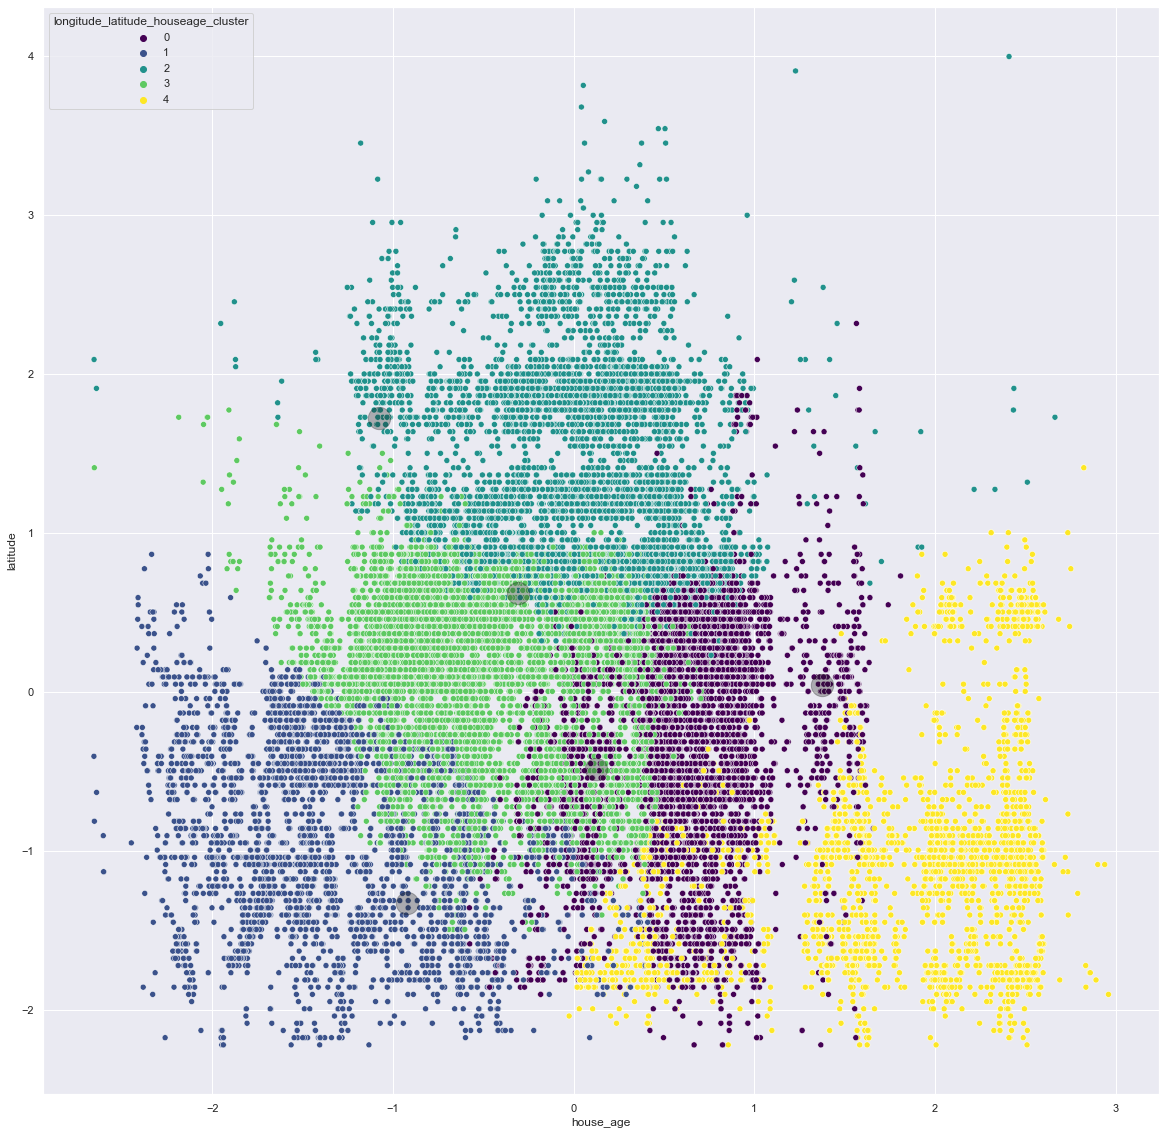

In [110]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = 'latitude', y= 'house_age', data = X_scaled, hue = X_scaled.longitude_latitude_houseage_cluster, palette='viridis')
centroids_scaled.plot.scatter(x = 'house_age', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

In [111]:
X = train[['fips', 'house_age', 'quality', 'square_feet']]
X.head(3)

fips  house_age  quality  square_feet
0  6037.0       70.0      6.0       1139.0
1  6059.0       65.0      6.0        882.0
2  6037.0       81.0      4.0        943.0

In [112]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

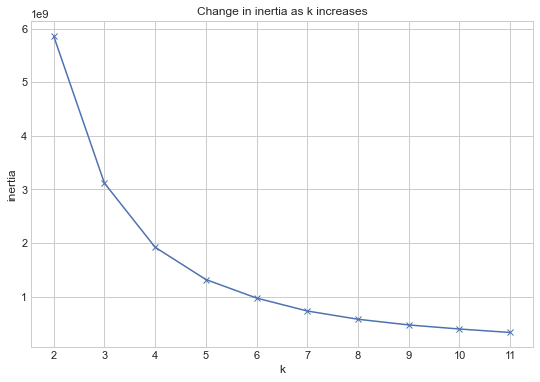

In [113]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [114]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, ..., 0, 2, 0], dtype=int32)

In [115]:
train['fips_houseage_quality_squarefeet_cluster'] = kmeans.predict(X_scaled)

train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
0  12397645      261.0                   1        2.0       3.0      6.0   
1  13899643      261.0                   0        1.0       2.0      6.0   
2  10936804      261.0                   1        1.0       2.0      4.0   
3  12877473      261.0                   1        3.0       5.0      6.0   
4  11190920      261.0                   1        2.0       4.0      8.0   

   square_feet    fips  has_fireplace  full_bathrooms  ...  house_age  \
0       1139.0  6037.0            0.0             2.0  ...       70.0   
1        882.0  6059.0            0.0             1.0  ...       65.0   
2        943.0  6037.0            0.0             1.0  ...       81.0   
3       1449.0  6037.0            0.0             3.0  ...       51.0   
4       1546.0  6037.0            0.0             2.0  ...       29.0   

    tax_rate     acres  level_of_log_error  square_feet_bins  lot_sqft_bins  \
0  77.088243  0.115886            Accurate           1k-1.5k          0-10k   
1  99.593289  0.094582            Accurate            500-1k          0-10k   
2  91.300853  0.163522            Accurate            500-1k          0-10k   
3  77.842486  0.141919                Over           1k-1.5k          0-10k   
4  51.992135  0.195294            Accurate           1.5l-2k          0-10k   

   acre_bins  quality_houseage_roomcount_cluster  \
0       0-15                                   4   
1       0-15                                   0   
2       0-15                                   1   
3       0-15                                   2   
4       0-15                                   3   

   longitude_latitude_houseage_cluster  \
0                                    3   
1                                    1   
2                                    2   
3                                    3   
4                                    4   

   fips_houseage_quality_squarefeet_cluster  
0                                         1  
1                                         1  
2                                         1  
3                                         1  
4                                         0  

[5 rows x 37 columns]

In [ ]:
X_scaled['fips_houseage_quality_squarefeet_cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

In [ ]:
# Cluster Centers aka (centroids)
kmeans.cluster_centers_

In [ ]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

In [ ]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'house_age', y= 'square_feet', data = X_scaled, hue = X_scaled.fips_houseage_quality_squarefeet_cluster, palette='viridis')
centroids_scaled.plot.scatter(x = 'house_age', y= 'square_feet', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)



plt.legend();

In [ ]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.swarmplot(x = train.quality, y= train.square_feet, data = X_scaled, hue = train.level_of_log_error, palette='viridis')
centroids_scaled.plot.scatter(x = train.quality, y= train.square_feet, ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)



plt.legend();

In [ ]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.swarmplot(x = train.quality, y= train.house_age, data = X_scaled, hue = train.level_of_log_error, palette='viridis')
centroids_scaled.plot.scatter(x = train.quality, y= train.house_age, ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)



plt.legend();